# Изучение закономерностей, определяющих успешность игр

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры: нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Сделаем это на основе исторических данных о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

## Откройте файл с данными и изучите общую информацию.

### Импортируем библиотеки, прочитаем файл и сохраним его в перменной data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

### Изучим данные: выведем первые 10 строк. 

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем 10 рандомных строк.

In [4]:
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12391,Assetto Corsa,PS4,2016.0,Racing,0.00,0.05,0.00,0.01,73.0,6.2,E
6813,Fuel,PS3,2009.0,Racing,0.08,0.11,0.00,0.04,67.0,7.4,E
2936,Minecraft: Story Mode,PS4,2015.0,Adventure,0.25,0.33,0.00,0.11,NaN,NaN,NaN
4910,BattleTanx: Global Assault,N64,1999.0,Action,0.31,0.07,0.00,0.00,NaN,NaN,NaN
1864,SingStar Rocks!,PS2,2006.0,Misc,0.00,0.84,0.00,0.25,NaN,NaN,NaN
14206,Harukanaru Toki no Naka de Yumenoukihashi Special,PS2,2009.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
13303,The Lord of the Rings: The Battle for Middle-E...,X360,2006.0,Strategy,0.00,0.04,0.00,0.00,79.0,7.5,T
5596,Darkwatch,PS2,2005.0,Shooter,0.16,0.12,0.00,0.04,74.0,8.4,M
1116,MySims,Wii,2007.0,Simulation,0.90,0.54,0.04,0.17,68.0,7.2,E
3772,Romance of the Three Kingdoms IV: Wall of Fire,SNES,1994.0,Strategy,0.00,0.00,0.53,0.00,NaN,NaN,NaN


Выведем основную информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод:</b> в таблице 11 столбцов и 16715 строк. 

В стоолбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating количество значений отличается от 16715, а значит есть пропуски.<br>
Year_of_Release - год реализации, можно изменить тип данных с float64 на int.
User_Score тип данных object, но это количественное значение, поэтому стоит изменить на float64.<br>
В названии столбцов использованы верхний регистр, надо привести к нижнему.<br>

## Предобработка данных

Проверим наличие явных дубликатов.

In [6]:
data.duplicated().sum()

0

### Заменим названия столбцов

In [7]:
data.columns = map(str.lower, data.columns) #заменим верхний регистр в названии столбцов на нижний
data #Проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Обработаем пропуски в данных

Посмотрим в каких столбцах и сколько пропусков. 

In [8]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<b>Вывод:</b> пропуски есть в 6 столбцах: 

<b>Name:</b> в этом столбце содержится информация с названием игры, соответственно заменить пропуски на среднее значение или медиану невозможно. Оставить пропуски не можем, так как при анализе не будет понятно о какой игре идет речь. Поэтому принимаем решение об удалении этих данных. Что касается причин позникновения пропусков, можно предположить, что при заведении данных забыли указать названия игр.</br>

<b>year_of_release:</b> в этом столбце содержится информация с годом выпуска игры. Процент пропусков от общего количества данных 1,6%. Удалим пропуски, т.к. у данных объектов нет информации по году выпуска и они будут мешать в анализе. Причны возникновения: может быть как ошибки при заведении данных, так же возможно, что при заведении данных год выпуска был неизвестен.</br>

<b>genre:</b> пропуски в жанрах игры. Заменить пропуски на какое-либо значение не представляется возможным, поэтому удалим их. Возможно, при заведении данных жанр игры был неизвестен.</br>

<b>critic_score, user_score, rating:</b> наибольшее количество пропусков наблюдается в оценках от критиков и от пользователей, а также в рейтинге возраста. Просто удалить эти значения не можем, т.к. это может оказать существенное влияние на анализ - пропущенных данных много. Оставляем как есть. Причины: возможно, данные игры были не оцененны на момент введения данных. </br>



#### Обработаем пропуски в name и genre

In [9]:
data.dropna(subset=['name', 'genre'], inplace=True) #Удвлим пропуски в столбцах с названием игры и с жанром
data.isnull().sum() #Проверим результат

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Обработка столбца Year_of_Release

В столбце year_of_release 269 пропусков. Изучим уникальные значения в иследуемом столбце. 

In [10]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Аномальных значений не видно. Есть лишь пропуски. Процент пропусков всего 1,6%. Удалим эти строки, т.к. у данных объектов нет информации по году выпуска и они будут мешать в анализе. 

In [11]:
data = data.dropna(subset=['year_of_release']) #удалим пропуски 
data.isna().sum() #проверим себя 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Обработка столбца user_score

Изучим уникальные значения в иследуемом столбце.

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В значения столбца user_score есть значение 'tbd'. Абрревиатура расшифровывается To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Т.е. можно сделать вывод о том, что tbd в столбце оценок от пользователей означает отсутсвие этой оценки на момент сбора данных. Поэтому можешь заменить это значение на nan. 

In [13]:
data.loc[data['user_score']== 'tbd', 'user_score'] = np.NaN
data['user_score'].unique()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Обработка пропусков в столбце rating 

In [14]:
data['rating'] = data['rating']. fillna ('Unknown')
data

/tmp/ipykernel_31/1412429755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating']. fillna ('Unknown')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


### Изменим тип данных

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int) #изменим тип данных с float на int, так как год выпуска - это целые числа.
data['user_score'] = data['user_score'].astype(float)
data.info() #проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/tmp/ipykernel_31/4274047104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'] = data['year_of_release'].astype(int) #изменим тип данных с float на int, так как год выпуска - это целые числа.
/tmp/ipykernel_31/4274047104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].astype(float)


### Посчитаем суммарные продажи для каждого региона

Рассчитаем сумму продаж во всех регионах, результаты добавим в новый столбец general_sales. Для рассчета суммируем значения нескольких столбцов (na_sales, eu_sales, jp_sales, other_sales). 

In [16]:
data['general_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1) #добавим новый столбец с рассчетами
data.head() #Проверим

/tmp/ipykernel_31/1820994006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['general_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1) #добавим новый столбец с рассчетами


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


<b>Вывод:</b> в результате предобработки данных было сделано следующее: 
1. Изменен регистр в названии столбцов 
2. Выявлены и обработаны пропуски в данных. 
3. Обработано значение 'tbd' в солбце с оценками от пользователей. 
4. Изменены типы данных:
   - year_of_release с float на int, т.к. в этом столбце находятся данные с годом выпуска игры, а год это целочисленное значение. 
   - user_score указаны численные данные об оценке игры пользователем, ранее тип данных был object. Если не изменить тип данных, то в дальнейшем могли возникнуть сложности в операции с этими данными. 
5. Добвлен столбец с суммами продаж по всем регионам.

## Исследовательский анализ данных

### Сколько игр выпускалось каждый год

In [17]:
#Сгрупируем данные и посчитаем сколько игр выпускалось каждый год
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

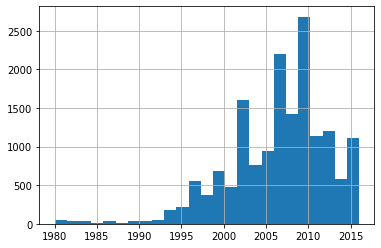

In [18]:
data['year_of_release'].hist(bins=25);

По сгруппированным данным видно, что всплеск по выпуску игр пришелся на период с 2005 по 2011 год. После наблюдался резкий спад, который продолжается и в 2016 году. Однако в 2015 наблюдался также небольшой вспеск по выпуску игр.  

### Как менялись продажи по платформам.

In [19]:
#Сгруппируем данные по платформам и выведем суммарные продажи в порядке убывания
data.groupby('platform')['general_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: general_sales, dtype: float64

На данном этапе видно, что выделяются площадки PS2, X360, PS3, Wii, DS, PS у них продажи больше 700 млн, в то время как у остальных платформ продажи меньше 400 млн. 
Продажи на платформах TG16, 3DO, GG, PCFX близятся к нулю.

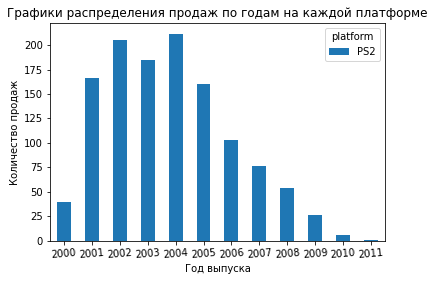

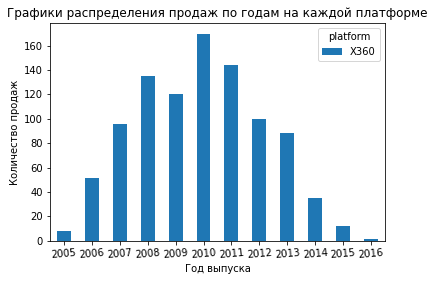

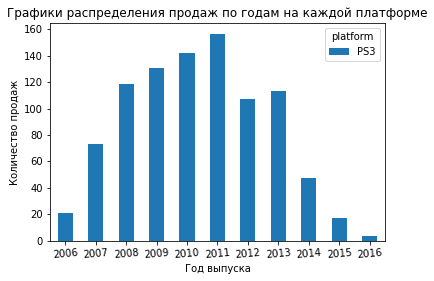

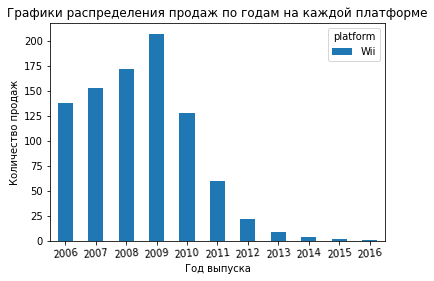

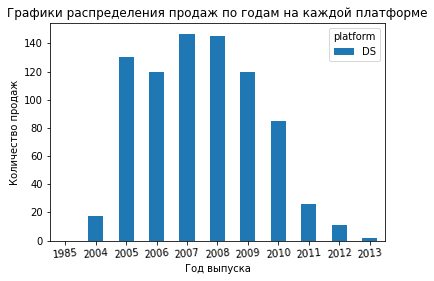

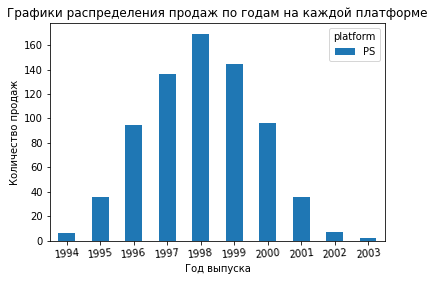

In [20]:
#Построим график распределения продаж на платформах с наиольшими суммарными продажами по годам
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for platform in top_platform:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='general_sales', columns='platform', aggfunc='sum').plot(kind="bar", rot=5, fontsize=10)
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество продаж')
    plt.title('Графики распределения продаж по годам на каждой платформе')
    plt.show()
    


После изучения графиков становится понятно, что исчезновение платформ происходит постепенно, жизненный цикл от начала работы и до исчезновения составляет в среднем 10 лет. После пика продаж за 5 - 6 лет платформа исчезает. 

### Выбор актуального периода

Предлагаю остановится на периоде с 2013 по 2016 год. 
Верхняя граница периода обусловлена датасетом и условиями задания - нужно сделать прогноз на 2017 год. 
Нижняя граница: данные за 2011 год думаю, что не следует включать в анализ, так как в 2011 году наблюдался всплеск выпуска игр и эти данные могут исказить ситуацию, которая наблюдается с 2012 года, а именно спад по выпуску и по продажам. 2012 год невключила в выбору в соответствии с жизненным циклом площадки: по графикам выше видно, что примерно время затухания площадки 5-6 лет. 

In [21]:
#Оставим в выгрузке только данные по 2012-2016 годам
data = data.query('2013 <= year_of_release <= 2016')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


### Изучение платформ в рамках выбранного периода

In [22]:
#Сгруппируем данные по платформам и выведем суммарные продажи в порядке убывания
data.groupby('platform')['general_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: general_sales, dtype: float64

Видно, что платформы с наибольшими продажами: PS4, PS3, XOne, 3DS, X360. После идет резкий спад по продажам. 

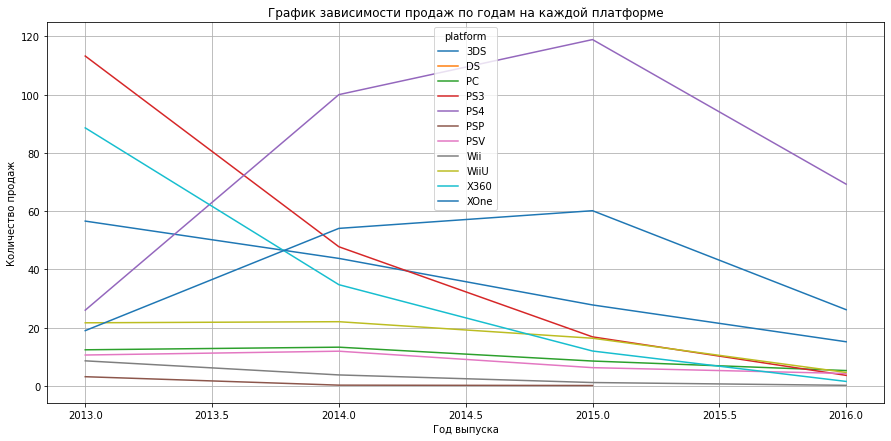

In [23]:
data.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж')
plt.title('График зависимости продаж по годам на каждой платформе')
plt.show()

По графику видно, что большинство платформ, которые ранее мы выделили на основании количество продаж, после пика стремятся к нулю, например: PS3, X360, 3DS. По графику видно, что у платформ PS4 и XOne пик продаж пришолся на 2015 год, и хотя спад уже начался, но на 2017 они еще будут приносить продажи. Предположительное время их затухания 2020 год (только лишь предположения, так как данных за период после 2016 года у нас нет). 
В качестве потенциально прибыльных платформ принимаю PS4 и XOne.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

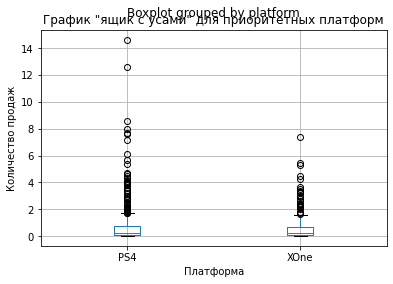

In [24]:
data_platform = data.query("platform == ['PS4', 'XOne']")
# построим общую диаграмму размаха
data_platform.boxplot(column='general_sales', by='platform')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('График "ящик с усами" для приоритетных платформ')
plt.show()

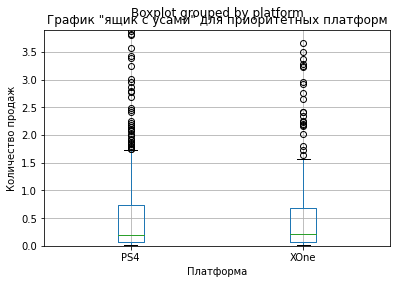

In [25]:
# сужаем диапазон продаж
data_platform.boxplot(column='general_sales', by='platform')
# подгоняем данные по стороне 'Y'
plt.ylim(0, 3.9)
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('График "ящик с усами" для приоритетных платформ')
plt.show()

По графику размаха видно, что есть выборосы по продажам. Однако эти данные оставим, так как некоторые игры могут быть значительно популярнее, "выстрелить" в продажах. Также по графику видно, что наибольшие суммы продаж наблюдаются на площадке PS4. 

### Изучим влияние отзывов критиков и пользователей на продажи в рамках одной популярной платформы

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмем платформу PS4, так как именно на этой платформе наблюдаются наибольшие продажи. 


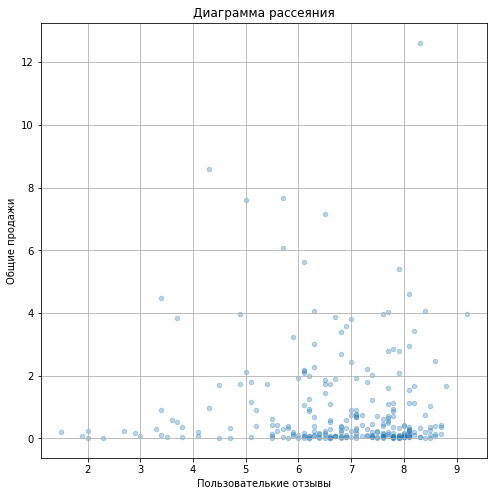

In [26]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
data[data['platform']=='PS4'].plot(x='user_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Пользователькие отзывы')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()

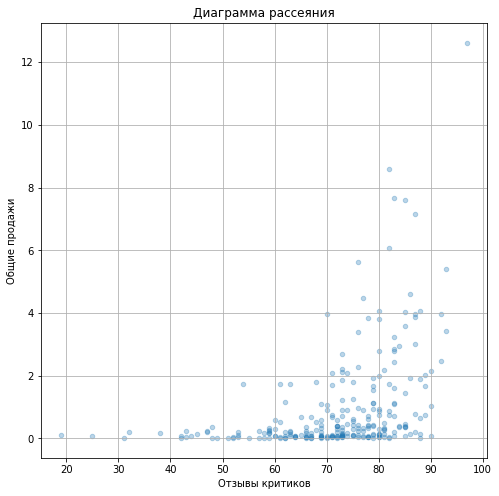

In [27]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы критиков
data[data['platform']=='PS4'].plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()

In [28]:
# вычислим корреляционную матрицу, диапазон элементов которой равен [-1, 1].
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['general_sales'])
print('Значение корреляции между отзывами пользователей и продажами:', data_ps4_cor)
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['general_sales'])
print('Значение корреляции между отзывами критиков и продажами:', data_ps4_cor)

Значение корреляции между отзывами пользователей и продажами: -0.031957110204556376
Значение корреляции между отзывами критиков и продажами: 0.40656790206178095


<b>Вывод:</b> корреляция между отзывами пользователей и продажами очень слабо отрицательная, отсутствующая. Слабо положительная корреляция наблюдается между отзывами критиков и продажами. Не смотря на то, что корреляция между отзывами критиков и продажами также слабая, однако она более выраженна, нежели между отзывами пользователей и продажами. 

### Соотнесем результаты с продажами на других платформах

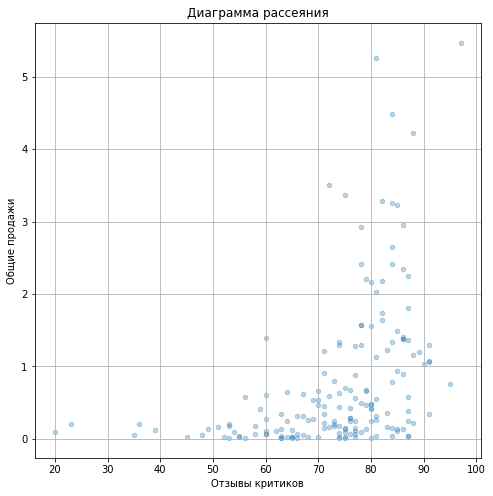

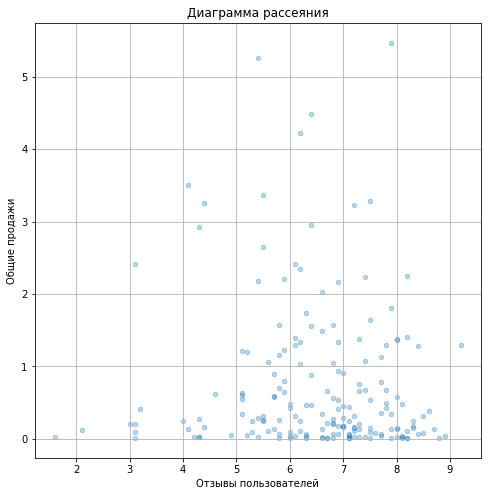

Значение корреляции между отзывами пользователей и продажами на площадке XOne: -0.06892505328279414
Значение корреляции между отзывами критиков и продажами на площадке XOne: 0.4169983280084017


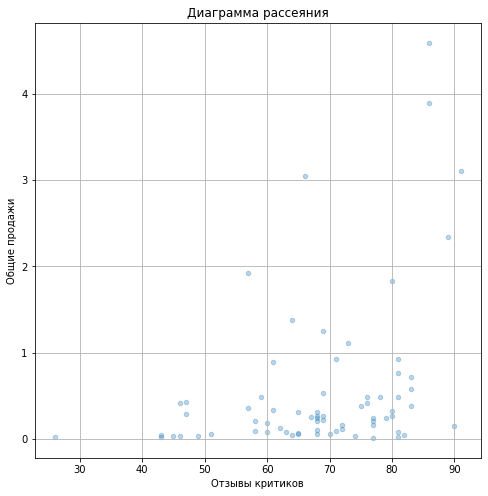

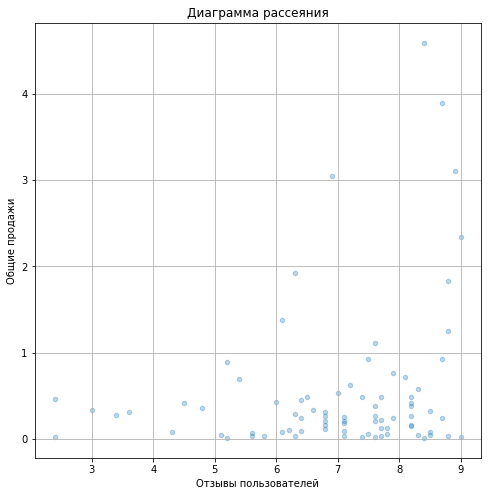

Значение корреляции между отзывами пользователей и продажами на площадке 3DS: 0.24150411773563016
Значение корреляции между отзывами критиков и продажами на площадке 3DS: 0.3570566142288103


In [29]:
# выведем таблицу рассеивания по платформе XOne, отобразив отзывы критиков
data[data['platform']=='XOne'].plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()
# выведем таблицу рассеивания по платформе XOne, отобразив отзывы пользователей
data[data['platform']=='XOne'].plot(x='user_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()
# вычислим корреляционную матрицу на платформе XOne
data_xone = data[data['platform']=='XOne']
data_xone_cor = data_xone['user_score'].corr(data_xone['general_sales'])
print('Значение корреляции между отзывами пользователей и продажами на площадке XOne:', data_xone_cor)
data_xone_cor = data_xone['critic_score'].corr(data_xone['general_sales'])
print('Значение корреляции между отзывами критиков и продажами на площадке XOne:', data_xone_cor)

# выведем таблицу рассеивания по платформе 3DS, отобразив отзывы критиков
data[data['platform']=='3DS'].plot(x='critic_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()
# выведем таблицу рассеивания по платформе XOne, отобразив отзывы пользователей
data[data['platform']=='3DS'].plot(x='user_score', y='general_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')
plt.title('Диаграмма рассеяния')
plt.show()
# вычислим корреляционную матрицу на платформе 3DS
data_3ds = data[data['platform']=='3DS']
data_3ds_cor = data_3ds['user_score'].corr(data_3ds['general_sales'])
print('Значение корреляции между отзывами пользователей и продажами на площадке 3DS:', data_3ds_cor)
data_3ds_cor = data_3ds['critic_score'].corr(data_3ds['general_sales'])
print('Значение корреляции между отзывами критиков и продажами на площадке 3DS:', data_3ds_cor)

Сравнив корреляцию продаж и отзывов по PS4 с корреляцией по XOne и 3DS, можно сделать вывод о том, что хоть значения коррекляции несколько отличаются, но также остаются слабыми. Корреляция отзывов критиков и продаж ярче выражена, положительная. 

### Изучим рапределение игр по жанрам

In [30]:
#сформируем таблицу с жанрами и продажами по каждому жанру в порядке убывания
data.pivot_table(index='genre', values='general_sales', aggfunc='sum').sort_values(by = 'general_sales', ascending = False)

,general_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


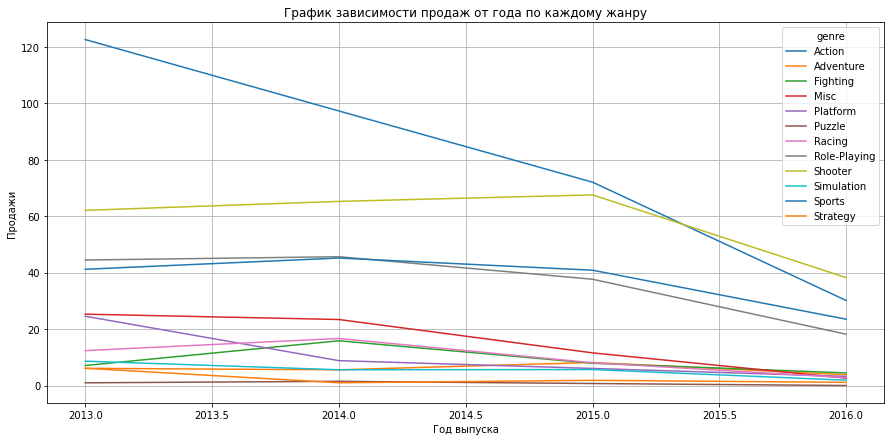

In [31]:
#Построим график зависимости продаж от года по каждому жанру
data.pivot_table(index='year_of_release', columns = 'genre', values='general_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7));
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('График зависимости продаж от года по каждому жанру');

По данным видно, что наиболее прибыльными являются жанры Action, Shooter, Sports, Role-Playing. по остальным жанрам наблюдаются значительно меньшие продажи. Выделяется жанар Puzzle, так как у него наименьшие продажи.
Начиная с 2015 года по всем жанрам наблюдается спад продаж. 

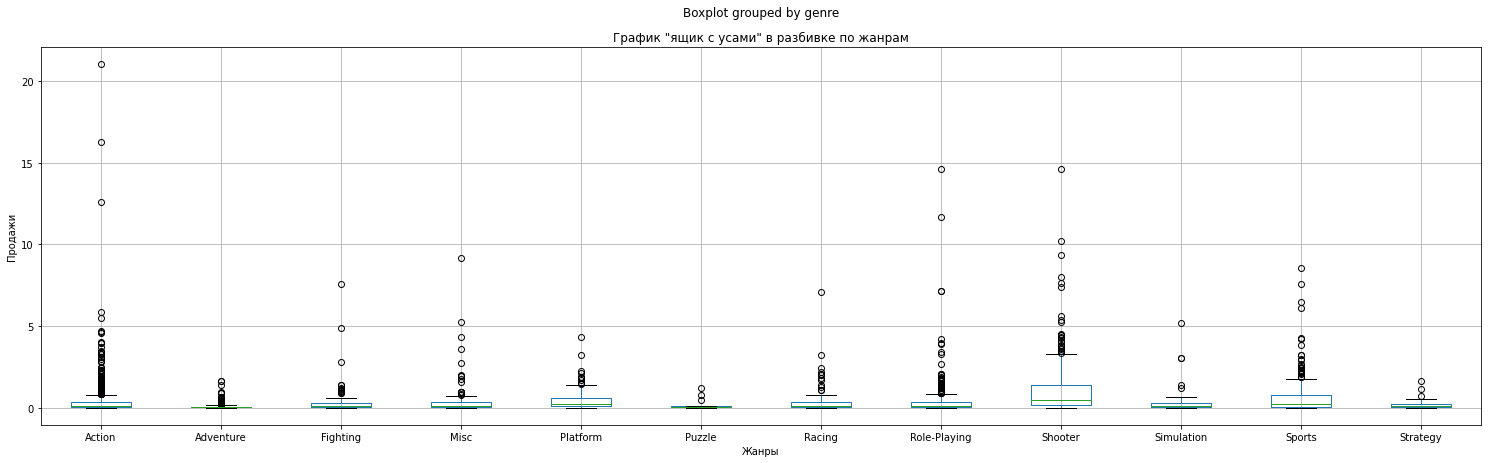

In [32]:
#Построим график "ящик с усами" в разбивке по жанрам
data.boxplot(column='general_sales', by='genre', figsize=(25,7))
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('График "ящик с усами" в разбивке по жанрам');
plt.show()

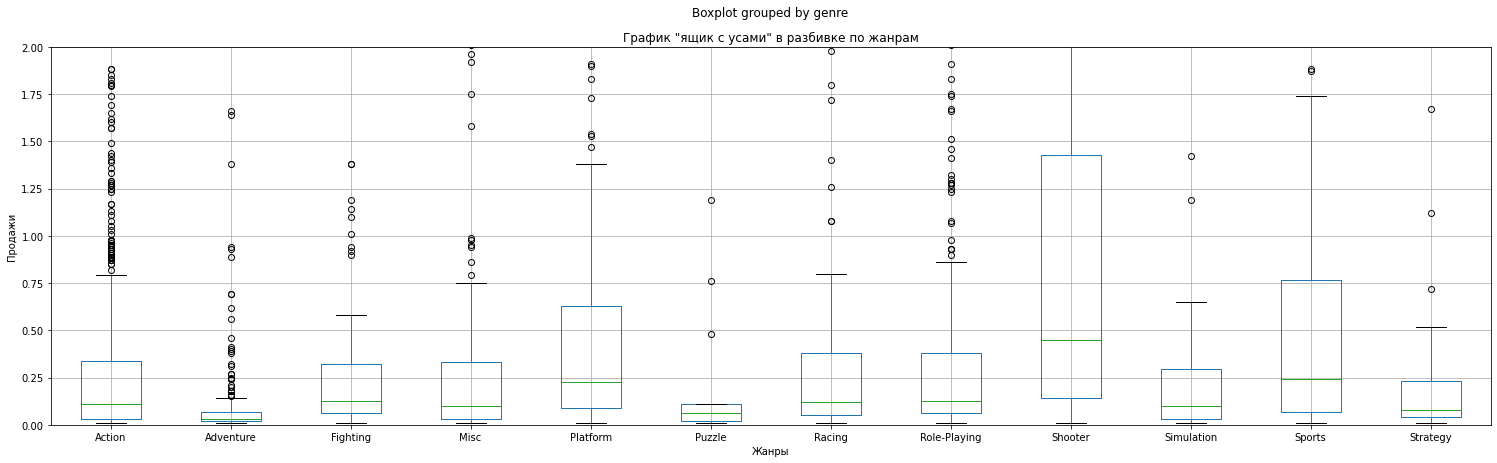

In [33]:
# сужаем диапазон 
data.boxplot(column='general_sales', by='genre', figsize=(25,7))
# подгоняем данные по стороне 'Y'
plt.ylim(0,2)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('График "ящик с усами" в разбивке по жанрам');
plt.show()

## Составим портрет пользователя каждого региона

### Определим самые популярные платформы (топ-5) для каждого региона. 

#### Определим топ-5 платформ для Северной Америки 

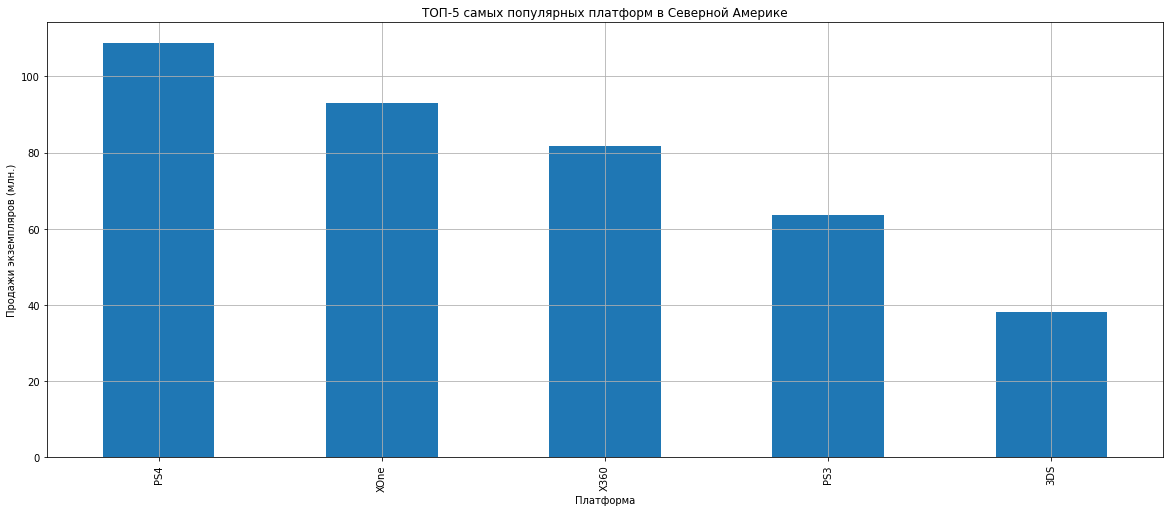

In [34]:
# ТОП-5 самых популярных платформ в Северной Америке
#группируем по платформе
top_platform_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы в Северной Америке: PS4, XOne, X360, PS3, 3DS. 

Вычислим долю продаж в Северной Америке

In [35]:
#переменной platform_general_sales присваиваем сумму общих продаж по всем платформам
platform_general_sales = data.groupby('platform')['general_sales'].sum()
#вычисляем процентное соотношение
share_sales_pl_na = top_platform_na / platform_general_sales * 100
display('Доля продаж в Северной Америке:')
display(top_platform_na.sort_values(ascending=False))

'Доля продаж в Северной Америке:'

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Лидерами по доле продаж в Северной Америке можно выделить PS4 и XOne. 

#### Определим топ-5 платформ для Европы

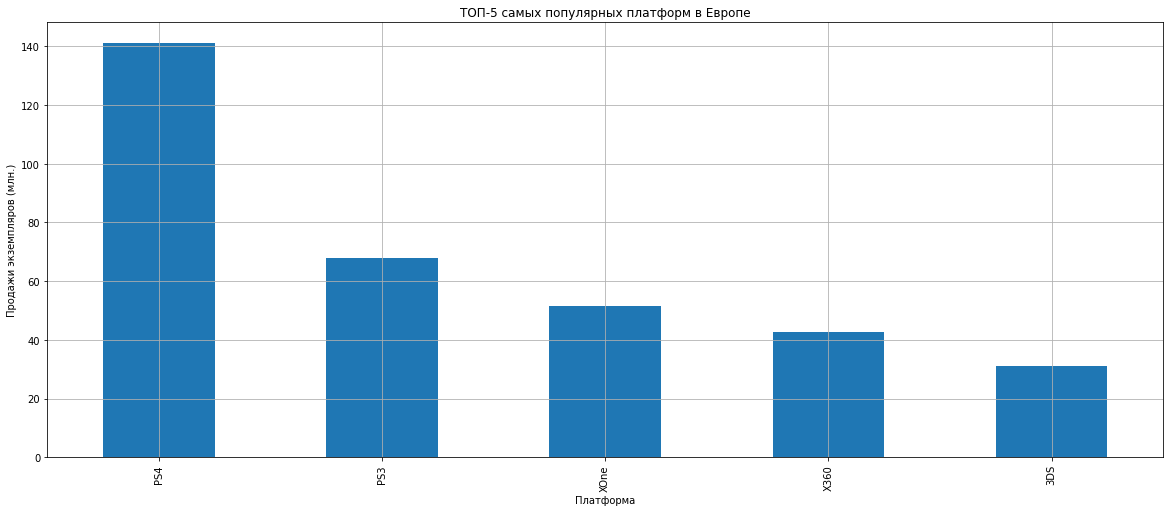

In [36]:
# ТОП-5 самых популярных платформ в Европе 
#группируем по платформе
top_platform_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_platform_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы в Европе: PS4, XOne, X360, PS3, 3DS. 

Вычислим долю продаж в Европе

In [37]:
#вычисляем процентное соотношение
share_sales_pl_eu = top_platform_eu / platform_general_sales * 100
display('Доля продаж в Европе:')
display(top_platform_eu.sort_values(ascending=False))

'Доля продаж в Европе:'

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

В Европе бессомненным лидером доли продаж является площадка PS4. 

#### Определим топ-5 платформ в Японии

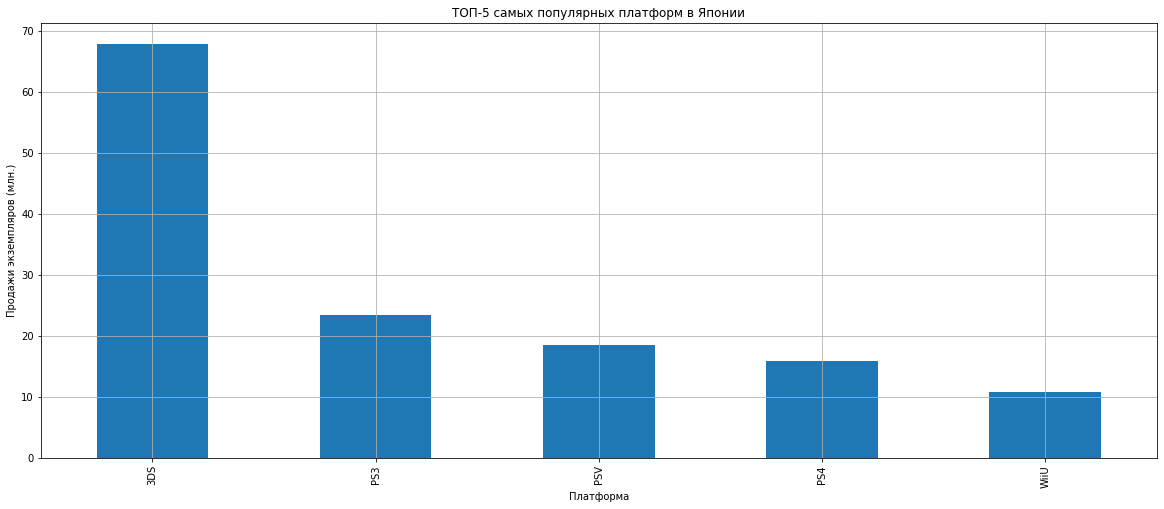

In [38]:
# ТОП-5 самых популярных платформ в Японии
#группируем по платформе
top_platform_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_platform_jp.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы в Японии: 3DS, PS3, PSV, PS4, WiiU.

Вычислим долю продаж в Японии

In [39]:
#вычисляем процентное соотношение
share_sales_pl_jp = top_platform_jp / platform_general_sales * 100
display('Доля продаж в Японии:')
display(top_platform_jp.sort_values(ascending=False))

'Доля продаж в Японии:'

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Несомненым лидером доли продаж в Японии является платформа 3DS. По остальным площадкам продажи гораздо ниже. 

#### Определим топ-5 платформ в остальных регионах

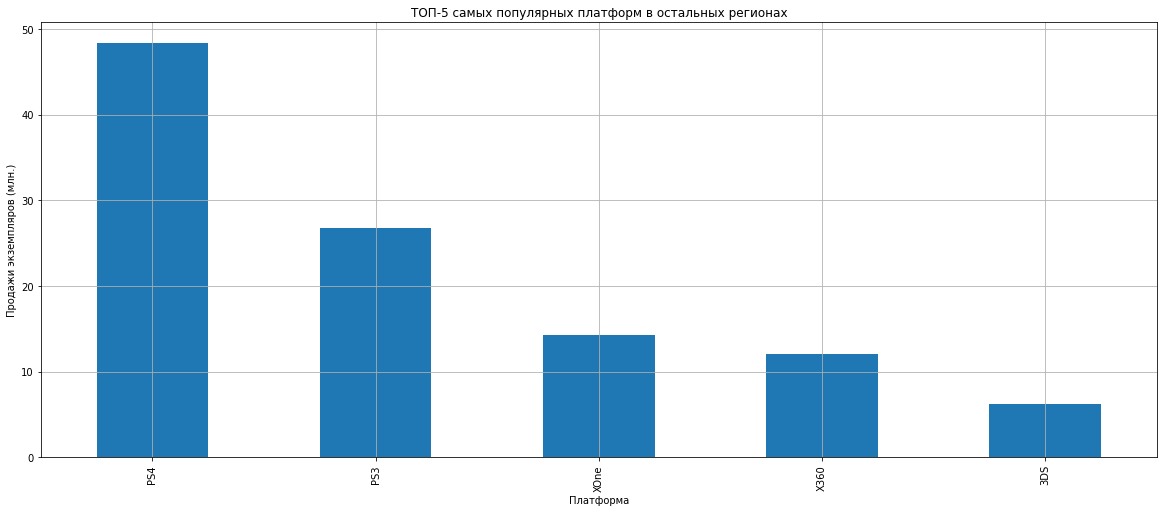

In [40]:
# ТОП-5 самых популярных платформ в Японии
#группируем по платформе
top_platform_other = data.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_platform_other.plot(x = 'platform', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных платформ в остальных регионах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самые популярные платформы в остальных регионах: PS4, PS3, XOne, X360, 3DS.

Вычислим долю продаж в остальных регионах. 

In [41]:
#вычисляем процентное соотношение
share_sales_pl_other = top_platform_other / platform_general_sales * 100
display('Доля продаж в остальных регионах:')
display(top_platform_other.sort_values(ascending=False))

'Доля продаж в остальных регионах:'

platform
PS4     48.35
PS3     26.77
XOne    14.27
X360    12.11
3DS      6.28
Name: other_sales, dtype: float64

Несомненым лидером доли продаж в остальных регионах является платформа PS4. По остальным площадкам продажи гораздо ниже. 

### Определим самые популярные жанры (топ-5) для каждого региона. 

#### Определим топ-5 жанров для Северной Америки 

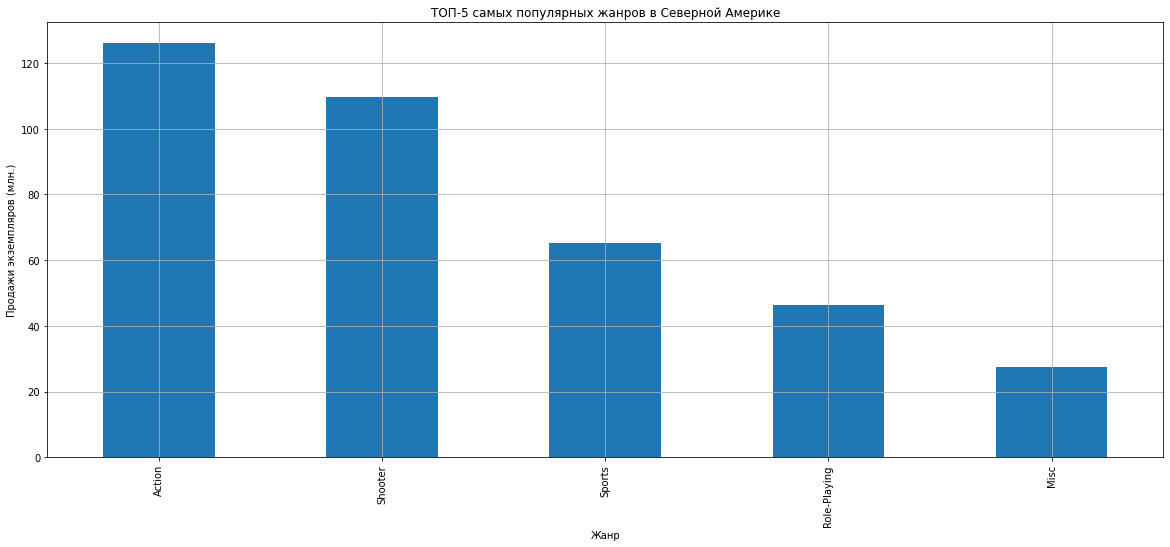

In [42]:
# ТОП-5 самых популярных жанров в Северной Америки
#группируем по платформе
top_genre_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самыми популярными жанрами в Северной Амеррике являются action, shooter, sports, role-playing, misk.

In [43]:
#вычисляем процентное соотношение
share_sales_gen_na = top_genre_na / platform_general_sales * 100
display('Доля продаж в Северной Америке:')
display(top_genre_na.sort_values(ascending=False))

'Доля продаж в Северной Америке:'

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

По доле продаж лидером среди жанров в Северной Америке является action. Достаточно близок к нему shooter. У остальных жанров доля продаж значительно ниже. 

#### Определим топ-5 жанров для Европы

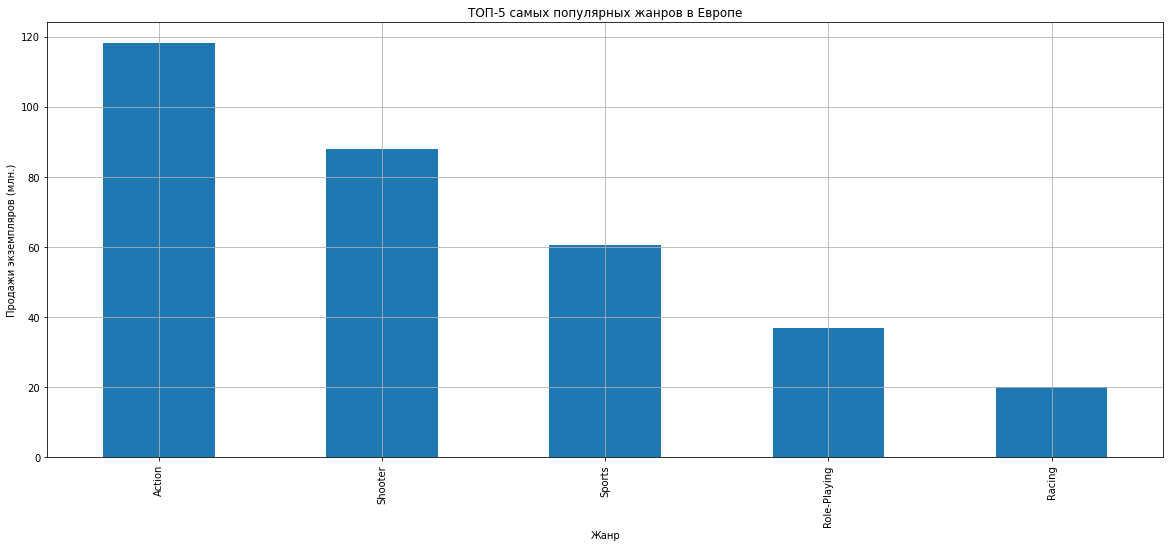

In [44]:
# ТОП-5 самых популярных жанров в Европе
#группируем по платформе
top_genre_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самыми популярными жанрами в Европе являются action, shooter, sports, role-playing, racing.

In [45]:
#вычисляем процентное соотношение
share_sales_gen_eu = top_genre_eu / platform_general_sales * 100
display('Доля продаж в Европе:')
display(top_genre_eu.sort_values(ascending=False))

'Доля продаж в Европе:'

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

По доле продаж лидером среди жанров в Северной Америке является action. У остальных жанров доля продаж значительно ниже. 

#### Определим топ-5 жанров для Японии

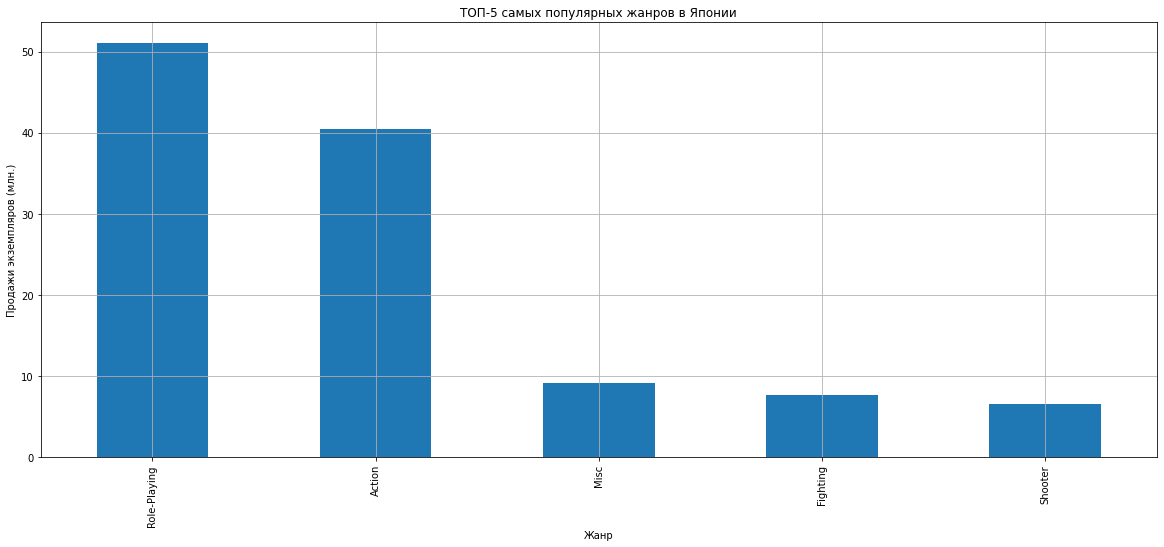

In [46]:
# ТОП-5 самых популярных жанров в Японии
#группируем по платформе
top_genre_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_genre_jp.plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самыми популярными жанрами в Европе являются role-playing, action, misk, fighting, shooter.

In [47]:
#вычисляем процентное соотношение
share_sales_gen_jp = top_genre_jp / platform_general_sales * 100
display('Доля продаж в Японии:')
display(top_genre_jp.sort_values(ascending=False))

'Доля продаж в Японии:'

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Лидером по доле продаж является Role-Playing. 

#### Определим топ-5 жанров для остальных регионов

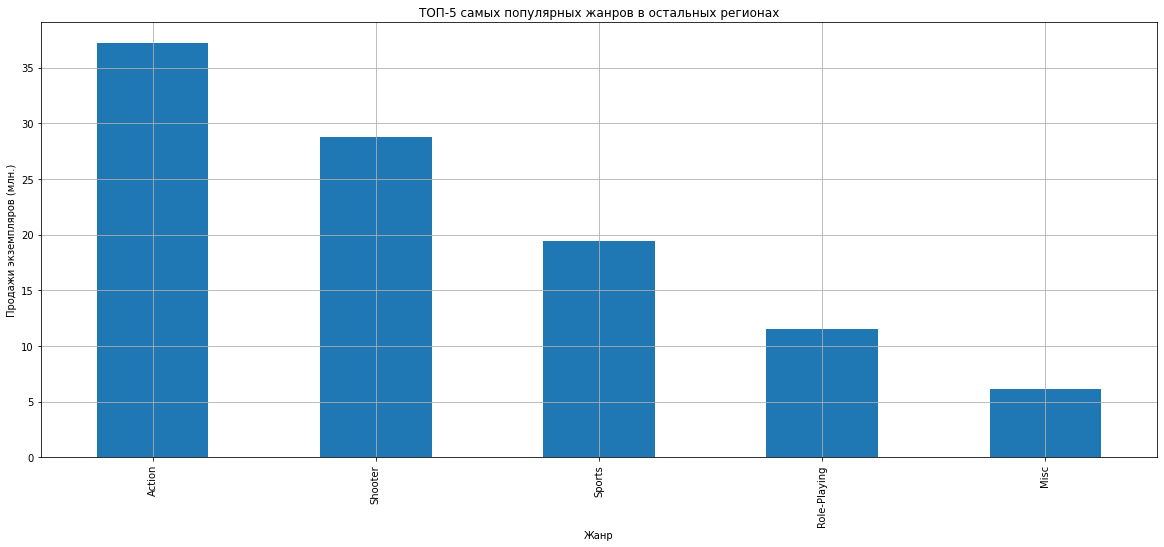

In [48]:
# ТОП-5 самых популярных жанров востальных регионах
#группируем по жанру
top_genre_other = data.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
top_genre_other.plot(x = 'genre', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в остальных регионах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самыми популярными жанрами в остальных регионах являются: action, shooter, sports, role-playing, misk.

In [49]:
#вычисляем процентное соотношение
share_sales_gen_other = top_genre_other / platform_general_sales * 100
display('Доля продаж в остальных регионах:')
display(top_genre_other.sort_values(ascending=False))

'Доля продаж в остальных регионах:'

genre
Action          37.20
Shooter         28.77
Sports          19.45
Role-Playing    11.48
Misc             6.09
Name: other_sales, dtype: float64

Лидером по доле продаж в остальных регионах является action. 

### Определим влияние рейтинга ESRB на продажи в отдельном регионе. 

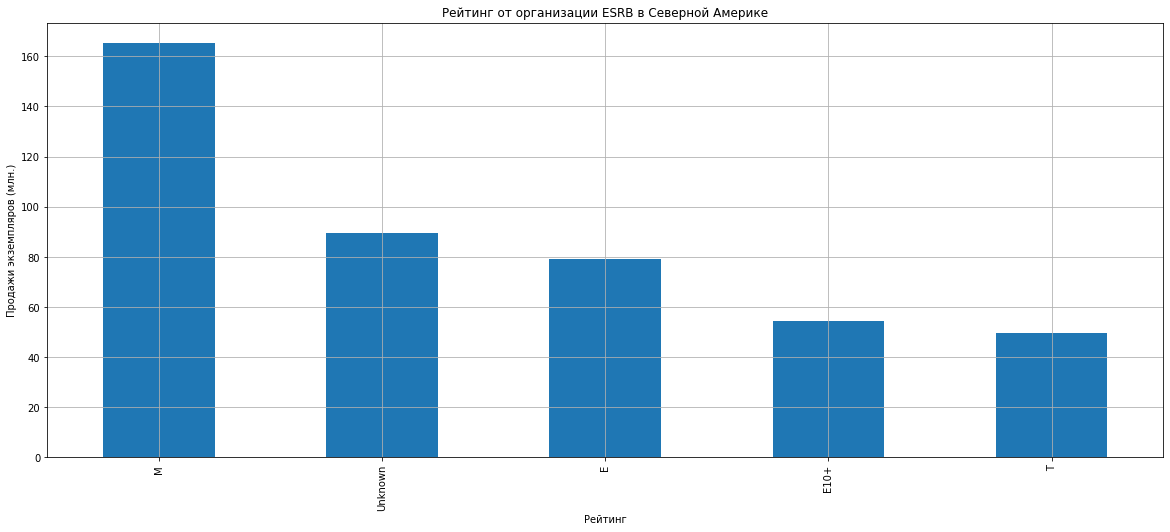

In [50]:
#  Рейтинг от организации ESRB в Северной Америке
#группируем по жанрам
rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке наиболее распространены игры, которым был присвоен рейтинг M ("Для взрослых", для пользователей старше 17 лет. Контент может содеражть сцены насилия, нецензурные выражения и т.д.). 

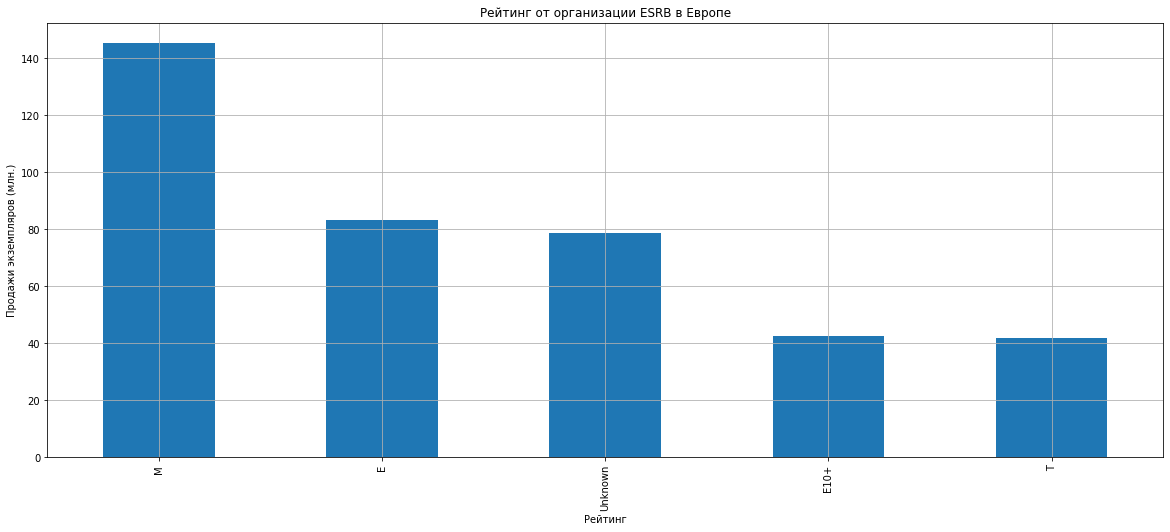

In [51]:
#  Рейтинг от организации ESRB в Европе
#группируем по жанрам
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе наиболее распространены игры, которым был присвоен рейтинг M ("Для взрослых", для пользователей старше 17 лет. Контент может содеражть сцены насилия, нецензурные выражения и т.д.). 

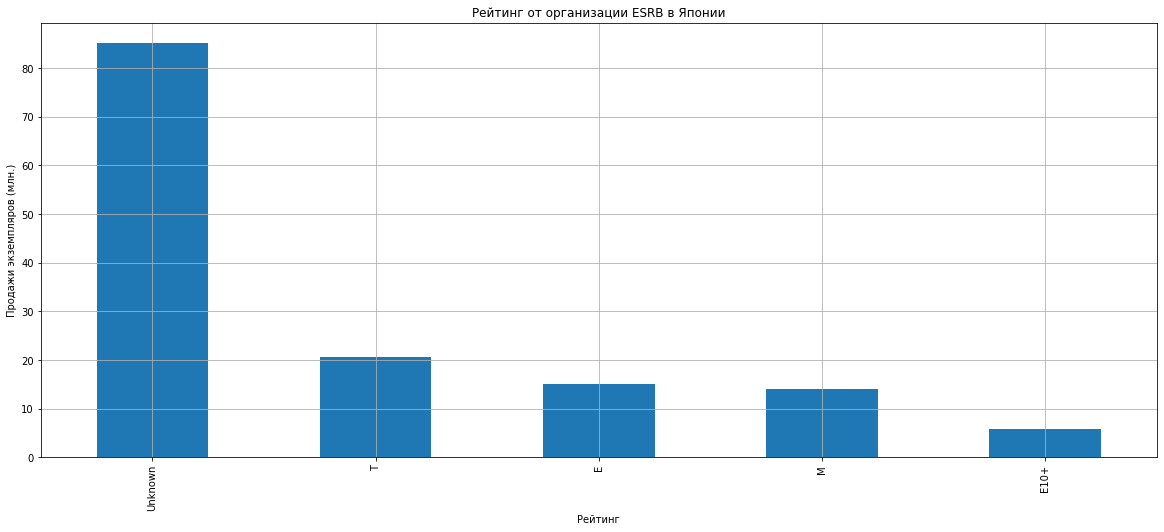

In [52]:
#  Рейтинг от организации ESRB в Японии
#группируем по жанрам
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии наиболее распространены игры, которым был присвоен рейтинг Т (Контент подходит для пользователей старше 13 лет. Контент может содеражть сцены насилия, наводящие на размышления, грубый юмор, имитацию азартных игр и т.д). 

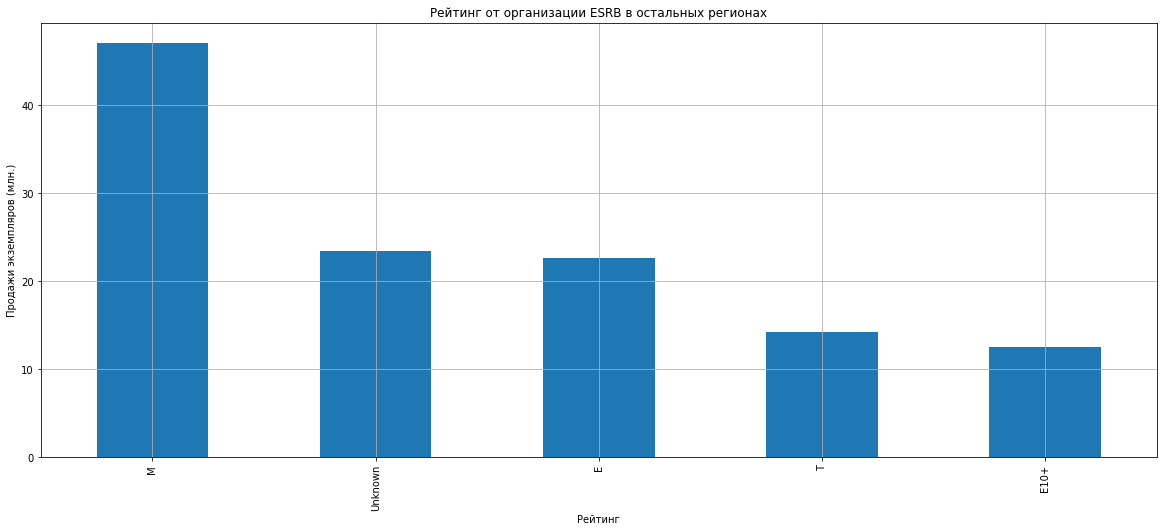

In [53]:
#  Рейтинг от организации ESRB в остальных регионах
#группируем по жанрам
rating_other = data.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_other.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в остальных регионах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В остальных регионах наиболее распространены игры, которым был присвоен рейтинг M ("Для взрослых", для пользователей старше 17 лет. Контент может содеражть сцены насилия, нецензурные выражения и т.д.). 

<b>Вывод:</b> были проанализированы топ-5 платформ и жанров, а также определены наиболее популярные игры в зависимости от возрастного рейтинга в каждом регионе. 
Рейтинг по платформам:
в Северной Америке - PS4
в Европе - PS4
в Японии - 3DS
в других странах - PS4

Рейтинг по жанрам:
в Северной Америке - Action
в Европе - Action
в Японии - Role-Playing
в других странах - Action

Рейтинг от организации ESRB:
в Северной Америке - M
в Европе - M
в Японии - Unknown
в других странах - M

На основании проведенного исследования можно сделать следующие выводы:
1. Портрет пользователя из Северной Америки: пользователь активно пользуется платформой PS4, предпочитает игры жанра action с рейтингом M. 
2. Портрет пользователя из Европы: пользователь активно пользуется платформой PS4, предпочитает игры жанра action с рейтингом M. 
3. Портрет пользователя из Японии: пользователь активно пользуется платформой 3DS, предпочитает игры жанра Role-Playing с неопределнным рейтингом. 
4. Портрет пользователя из остальных регионов: пользователь активно пользуется платформой PS4, предпочитает игры жанра action с рейтингом M. 
5. Пользователи из Северной Америки, Европы и других регионов имеют одинаковый портрет. Отличается только портрет пользователя из Японии. 
6. Предпологаю, что жанровые различия могут быть обусловлены культурными различиями. 

## Проверим гипотезы

Как формулируем гипотезы: H₀ (нулевая гиоптеза) всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.

Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Оно может звучать так: «среднее генеральной совокупности не равно A».

-уровень - пороговый уровень статистической значимости; вероятность ошибочно отклонить нулевую гипотезу.

Чем меньше -уровень, тем меньше риск совершения этой ошибки. Устанавливается исследователем произвольно (обычно принимается равным 0,05, 0,01 или 0,001).

Хотя в теории и на практике для альфа может использоваться много чисел, наиболее часто используется 0,05. Причина этого заключается в том, что консенсус показывает, что этот уровень подходит во многих случаях, и исторически он был принят в качестве стандарта. 

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [54]:
XOne = data[(data['platform'] == 'XOne') &  (data['user_score'] > 0)]['user_score']#.mean().round()
PC = data[(data['platform'] == 'PC') &  (data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:

H0: средние рейтинги по платформам одинаковые</br> ("Да, одинковые (или равны)" - то, как должна звучать нулнвая гипотеза, поэтому сформулировали так). 

H1: средние рейтинги по платформам разные</br> 

In [55]:
#проверяем первую гипотезу

alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Результат говорит о том, что мы не можем отвергнуть нулевую гипотезу, а именно "средние рейтинги по платформам одинаковые". С достаточно большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [56]:
Action = data[(data['genre'] == 'Action') &  (data['user_score'] > 0)]['user_score']#.mean().round()
Sports = data[(data['genre'] == 'Sports') &  (data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:

H0: средние рейтинги по жанрам одинаковые

H1: средние рейтинги по жанрам разные

In [57]:
#проверяем вторую гипотезу

alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Результат говорит о том, что мы можем отвергнуть нулевую гипотезу, а именно "средние рейтинги по жанрам одинаковые". С достаточно большой долей вероятности средние рейтинги по жанрам различны. 

## Общий вывод

В ходе работы над проектом было выполнено следующее: 
1. Ознакомились с данными и импортировали все необходимые библиотеки для дальнейшего анализа
2. Провели преподготовку данны: - изменили название столбцов (сменили регистр);
                                - обработали пропуски и другие значения;
                                - изменили тип данных;
                                - добавили столбец с рассчитанными данными: суммарные продажи во всех регионах.
3. Провели исследовательский анализ выяснили следующее: 
   - пик выпуска игр пришелся на период с 2005 по 2011 год;
   - определили наиболее перспективные платформы, и это: PS4 и XOne.
   - изучили влияние отзывов критиков и пользователей на продажи игр. Так оценка критиками игры в большей степент влияет на ее продажи (корреляция положительная, поэтому чем выше оценка, тем больше продается), однако в любом случае зависимость нельзя назвать сильной. 
   - по медиане продаж определили самые прибыльные жанры, это: Shooter, Sports, Platform.
4. Составили портреты пользователей для каждого региона: 
Портреты пользователей в Северной Америке, Европе и других регионах в среднем одиинаковы: в большей степени предпочитают платформу PS4 с играми в жанре action и с возрастным рейтингом M. 
Отличается портрет пользователя из Японии: предпочитает использовать 3DS и игры жанра Role-Playing с неизвестным рейтингом.
5. Проверили гипотезы. Так гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" не отвергаем, а это значит, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
Подтвердили гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". 

<b>Какие могут быть данны рекомендации заказчику:</b>
Предпочтения пользователей из Северной Америки, Европы и других регионов не отличаются, а соответственно не требуют раздельной проработки стратегии рекламных кампаний. Пользователи данныых регионов в большей степени предпочитают игры жанра action с рейтингом М на платформе PS4. Также отмечу, что вторым по популярности жанром игры в этих регионах является Shooter. Если учесть, что игры жанра Shooter являются наиболее прибыльными, а также принять во внимание достаточно высокий интерес к ним среди пользователей данных регионов, то также можно посоветовать заказчику проработать рекламную кампанию игр жанра Shooter. 

Отдельная реклама нужна для пользователей из Японии. Так, пользователи данного региона предпочитают игры жанра Role-Playing на платформе 3DS. Больше всего продаж среди игр с неизвестным возрастным рейтингом. Здесь надо уточнять по какой причине данный рейтинг не был проставлен. 
Могу предположить, что причина в том, что в данном исследовании мы использовали информацию американской рейтинговой модели ESRB, в то время как в Японии - CERO. 

<b>После внесения правок были пересмотрены некоторые выводы:</b>
- Изменился топ наиболее прибыльных жанров. Делаю вывод, что для определение наибоее прибольного жанра некорректно использовать данные по Общим продажам, так как внутри одного жанра может быть несколько прорывных игр, а остальные - провальные. Это может существенно исказить выводы. В таком случае удобно использоват график "ящик с усами", так как он позволяет визульано увидить медианы каждого из жанров.
- Некорректно избавляться от пропущенных данных в таких параметрах, как возростной рейтинг, это существенно искажает сделанные выводы. 